In [53]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline               

In [54]:
plt.rcParams['figure.figsize'] = (23, 10)
df = pd.read_csv('problem_1.csv')
df.head()

,Business Unit,Product Family,PLID,Fiscal Quarter,Fiscal Month,Booked_Qty,Booking_Date
0,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,AUG FY2022,204,01-08-2016
1,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,OCT FY2022,564,01-10-2016
2,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,SEP FY2022,1476,01-09-2016
3,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2002,AUG FY2002,374,01-08-2017
4,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2002,OCT FY2002,6094,01-10-2017


In [55]:
array = df.to_numpy()
print(array)

[['CSWBU' 'CBR8' 'CBR-D121-DS-MOD' ... 'AUG FY2022' 204 '01-08-2016']
 ['CSWBU' 'CBR8' 'CBR-D121-DS-MOD' ... 'OCT FY2022' 564 '01-10-2016']
 ['CSWBU' 'CBR8' 'CBR-D121-DS-MOD' ... 'SEP FY2022' 1476 '01-09-2016']
 ...
 ['RTOBU' 'C980040' 'C9800-40-K9' ... 'JUL FY2012' 1231 '01-07-2021']
 ['RTOBU' 'C980040' 'C9800-40-K9' ... 'JUN FY2012' 591 '01-06-2021']
 ['RTOBU' 'C980040' 'C9800-40-K9' ... 'MAY FY2012' 601 '01-05-2021']]


In [56]:
print(len(array))

10996


In [57]:
# plot 1 [booked quantity VS business unit]

business_units = df["Business Unit"]
booked_quants = df["Booked_Qty"]


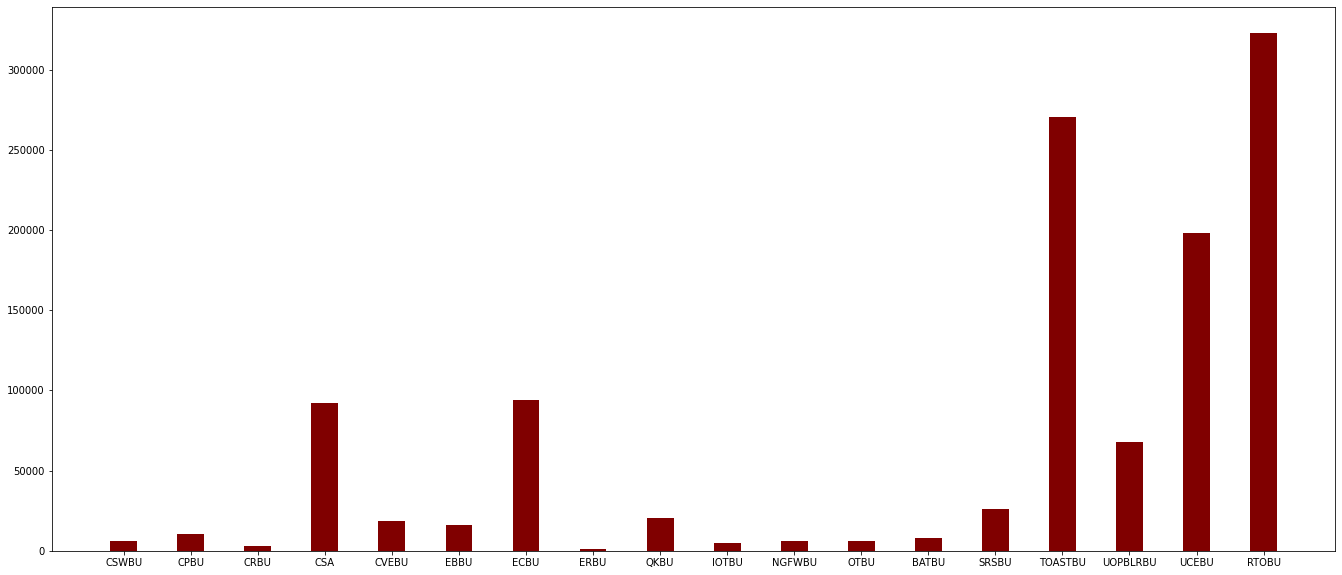

In [58]:
# display plot
plt.bar(business_units, booked_quants, color ='maroon', width = 0.4)
plt.show()

In [59]:
# plot 2 [booked quantity vs product family]

new_df = df[["Product Family", "Booked_Qty"]]
grouped = new_df.groupby("Product Family")['Booked_Qty'].sum()

array_2 = grouped.to_numpy()

In [60]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.precision', 3, ):
    print(grouped)

Product Family
15454W        37026
4300ISR     1697315
8000          27343
A9K1000      199111
A9K9000       22665
A9K920       147575
A9K9KFM       43885
C1000        145905
C3560CX      267626
C3650         25274
C9105AX      403076
C9115AX      824370
C9120AX     2850175
C9130AX     1211695
C9200        431123
C9200L      1143255
C9300       3214243
C9300AG       66073
C9300L       136144
C9400       1147008
C9500        242612
C9600         33431
C980040       17598
CAT8200       19716
CAT8300       22246
CAT8500        7049
CBR8         126162
CPAK100      254520
CTSMPS        11186
CTSPS         36591
CTSQS        809177
DNAHW        103106
FPRHIGH        6064
FPRLOW        77362
HXCPU          2218
HXSSD        120849
IE4000        87565
ISR1121      468634
ISR1K       1140941
ISR900        49951
MDS9000     1250146
N3000           541
N9300        468866
N9500        105473
NCS1000       20363
NCS4000        1008
NCS4200       12015
NCS540       245061
NCS5500       30901
NCS55

In [61]:
df = pd.read_csv('problem_1.csv')

In [62]:
parts = df["Booking_Date"].str.split("-", n = 3, expand = True)
df.head()
arr = df.to_numpy()

# separate date of order
df["year"]= parts[2].astype('int')
df["month"]= parts[1].astype('int')
df["year"].head()
df['prod_info'] = df['Business Unit'] + df['Product Family'] + df['PLID']

# print results
print(df['Business Unit'].nunique(),'Business Unit')
print(df['Product Family'].nunique(),'Product Family')
print(df['PLID'].nunique(),'PLID')
print(df['year'].nunique(),'year')
print(df['month'].nunique(),'month')

# replace features with numbers
df['Business Unit Val'] = pd.factorize(df['Business Unit'])[0]
df['Product Family Val'] = pd.factorize(df['Product Family'])[0]
df['PLID Val'] = pd.factorize(df['PLID'])[0]

# remove old features
df.drop('Fiscal Quarter', inplace=True, axis=1)
df.drop('Business Unit', inplace=True, axis=1)
df.drop('PLID', inplace=True, axis=1)
df.drop('Fiscal Month', inplace=True, axis=1)
df.drop('prod_info', inplace=True, axis=1)
df.drop('Product Family', inplace=True, axis=1)
df.drop('Booking_Date', inplace=True, axis=1)

data = df.copy()
df.head()

18 Business Unit
73 Product Family
250 PLID
10 year
12 month


,Booked_Qty,year,month,Business Unit Val,Product Family Val,PLID Val
0,204,2016,8,0,0,0
1,564,2016,10,0,0,0
2,1476,2016,9,0,0,0
3,374,2017,8,0,0,0
4,6094,2017,10,0,0,0


In [65]:
# x and y for training
ydf = df['Booked_Qty']
xdf = df[["Business Unit Val", "Product Family Val", "PLID Val", "month", "year"]]

# convert to numpy
y = ydf.to_numpy()
x = xdf.to_numpy()

print(x, y)

[[   0    0    0    8 2016]
 [   0    0    0   10 2016]
 [   0    0    0    9 2016]
 ...
 [  17   72  249    7 2021]
 [  17   72  249    6 2021]
 [  17   72  249    5 2021]] [ 204  564 1476 ... 1231  591  601]
